Exercise 5 Problem 1

In [1]:
import geopandas as gpd
from pyproj import CRS
import requests
import geojson
import matplotlib.pyplot as plt

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

<AxesSubplot:>

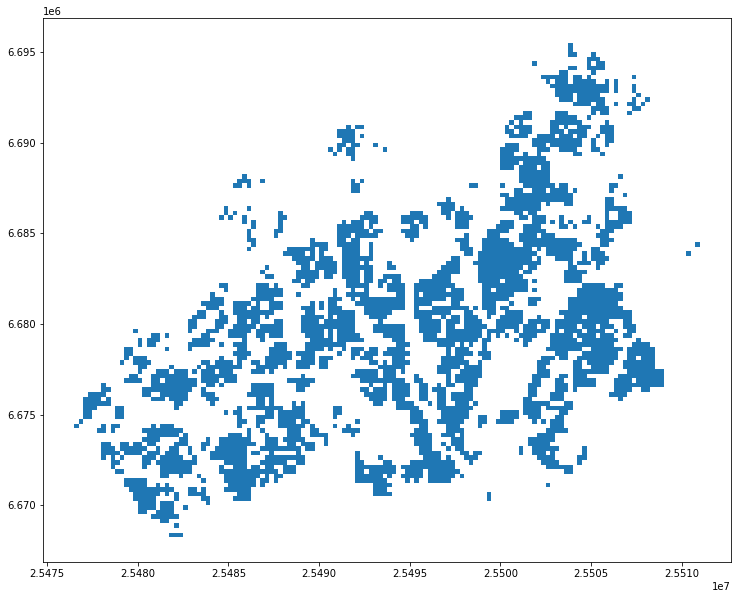

In [2]:
pop.plot(figsize=(15,10))

In [3]:
pop["seniors"] = pop["ika70_79"] + pop["ika_yli80"]

In [4]:
grid = pop[["geometry", "seniors"]]

In [5]:
grid.head()

,geometry,seniors
0,MULTIPOLYGON Z (((25476499.999 6674248.999 0.0...,10
1,MULTIPOLYGON Z (((25476749.997 6674498.998 0.0...,9
2,MULTIPOLYGON Z (((25476999.994 6675749.004 0.0...,12
3,MULTIPOLYGON Z (((25476999.994 6675499.004 0.0...,6
4,MULTIPOLYGON Z (((25476999.994 6675249.005 0.0...,5


In [6]:
postcode_areas_fp = "data/uusimaa_postal_code_areas.gpkg"

In [7]:
postal = gpd.read_file(postcode_areas_fp)

In [8]:
import pandas as pd
pks_postal = pd.read_csv("PKS_Postinumeroalueet_2019.csv", sep = ";")
vantaa_postal = pks_postal.loc[pks_postal['Postitoimipaikka'] == "VANTAA"]
vantaa_postal["Postinumero"] = "0" + vantaa_postal["Postinnumero"].astype(str)

<ipython-input-8-eb14d3f4d599>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vantaa_postal["Postinumero"] = "0" + vantaa_postal["Postinnumero"].astype(str)


In [9]:
vantaa_postal.head()
vantaa_postal_list = list(vantaa_postal["Postinumero"])
vantaa_postal_list

['01200',
 '01230',
 '01260',
 '01280',
 '01300',
 '01340',
 '01350',
 '01360',
 '01370',
 '01380',
 '01390',
 '01400',
 '01420',
 '01450',
 '01480',
 '01490',
 '01510',
 '01520',
 '01530',
 '01600',
 '01610',
 '01620',
 '01630',
 '01640',
 '01650',
 '01660',
 '01670',
 '01680',
 '01690',
 '01700',
 '01710',
 '01720',
 '01730',
 '01740',
 '01750',
 '01760',
 '01770']

In [10]:
postal = postal.loc[postal['posti_alue'].isin(vantaa_postal_list)]

In [11]:
postal.tail()

,posti_alue,he_vakiy,geometry
118,01730,2586.0,"MULTIPOLYGON (((381049.389 6685421.122, 381004..."
119,01740,199.0,"MULTIPOLYGON (((383468.203 6683769.368, 383285..."
120,01750,868.0,"MULTIPOLYGON (((377399.982 6687719.587, 376382..."
121,01760,2096.0,"MULTIPOLYGON (((384117.772 6689721.389, 383401..."
122,01770,NaN,"MULTIPOLYGON (((381185.011 6685150.231, 381049..."


In [12]:
grid.crs = CRS.from_epsg(3879).to_wkt()

In [13]:
# Reproject to EPSG 3857
postal = postal.to_crs(epsg=3857)
grid = grid.to_crs(epsg=3857)

In [14]:
intersection = gpd.overlay(grid, postal, how='intersection')
intersection.head()

,seniors,posti_alue,he_vakiy,geometry
0,10,01630,2055.0,"POLYGON Z ((2757235.453 8458227.465 0.000, 275..."
1,7,01630,2055.0,"POLYGON Z ((2758853.428 8459240.165 0.000, 275..."
2,7,01630,2055.0,"POLYGON Z ((2759354.590 8459745.436 0.000, 275..."
3,21,01630,2055.0,"POLYGON Z ((2759356.207 8459241.803 0.000, 275..."
4,19,01630,2055.0,"POLYGON Z ((2759857.404 8459747.039 0.000, 275..."


In [15]:
import contextily as ctx

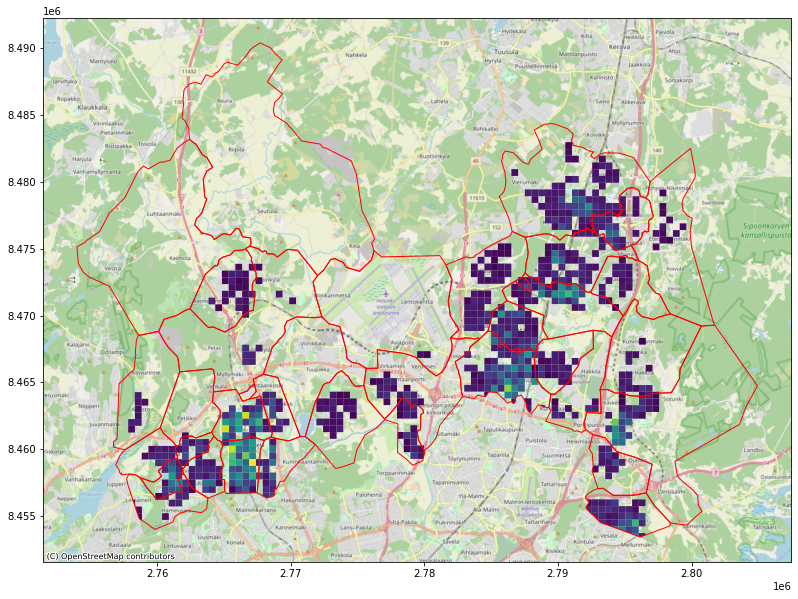

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

intersection.plot(ax=ax, column="seniors")

postal.plot(ax=ax, facecolor='None', edgecolor='red')

# Add basemap 
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)